In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

# Data Loading

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/Top mentors data/practice/datas/DT/Covid Data.csv')
df.head

<bound method NDFrame.head of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2   

# Performing EDA

In [3]:
df.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

In [4]:
df.shape

(1048575, 21)

In [7]:
df.describe(include='all')

USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE   DATE_DIED  \
count   1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06     1048575   
unique           NaN           NaN           NaN           NaN         401   
top              NaN           NaN           NaN           NaN  9999-99-99   
freq             NaN           NaN           NaN           NaN      971633   
mean    1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00         NaN   
std     4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01         NaN   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00         NaN   
25%     1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00         NaN   
50%     2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00         NaN   
75%     2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00         NaN   
max     2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00         NaN   

             INTUBED     PNEUMONIA           AGE      PREGNANT      DIABETES  \
count   1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    7.952288e+01  3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00   
std     3.686889e+01  1.191288e+01  1.690739e+01  4.751073e+01  5.424242e+00   
min     1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%     9.700000e+01  2.000000e+00  3.000000e+01  2.000000e+00  2.000000e+00   
50%     9.700000e+01  2.000000e+00  4.000000e+01  9.700000e+01  2.000000e+00   
75%     9.700000e+01  2.000000e+00  5.300000e+01  9.700000e+01  2.000000e+00   
max     9.900000e+01  9.900000e+01  1.210000e+02  9.800000e+01  9.800000e+01   

        ...        ASTHMA       INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count   ...  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
unique  ...           NaN           NaN           NaN            NaN   
top     ...           NaN           NaN           NaN            NaN   
freq    ...           NaN           NaN           NaN            NaN   
mean    ...  2.242626e+00  2.298132e+00  2.128989e+00   2.435143e+00   
std     ...  5.114089e+00  5.462843e+00  5.236397e+00   6.646676e+00   
min     ...  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%     ...  2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
50%     ...  2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
75%     ...  2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
max     ...  9.800000e+01  9.800000e+01  9.800000e+01   9.800000e+01   

        CARDIOVASCULAR       OBESITY  RENAL_CHRONIC       TOBACCO  \
count     1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06   
unique             NaN           NaN            NaN           NaN   
top                NaN           NaN            NaN           NaN   
freq               NaN           NaN            NaN           NaN   
mean      2.261810e+00  2.125176e+00   2.257180e+00  2.214333e+00   
std       5.194850e+00  5.175445e+00   5.135354e+00  5.323097e+00   
min       1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
25%       2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
50%       2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
75%       2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
max       9.800000e+01  9.800000e+01   9.800000e+01  9.800000e+01   

        CLASIFFICATION_FINAL           ICU  
count           1.048575e+06  1.048575e+06  
unique                   NaN           NaN  
top                      NaN           NaN  
freq                     NaN           NaN  
mean            5.305653e+00  7.955397e+01  
std             1.881165e+00  3.682307e+01  
min             1.000000e+00  1.000000e+00  
25%             3.000000e+00  9.700000e+01  
50%             6.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [7]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [8]:
df.corr()

USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE  \
USMER                 1.000000      0.127927 -0.001126     -0.190570   
MEDICAL_UNIT          0.127927      1.000000  0.001475     -0.205413   
SEX                  -0.001126      0.001475  1.000000      0.089505   
PATIENT_TYPE         -0.190570     -0.205413  0.089505      1.000000   
INTUBED               0.175457      0.205243 -0.089943     -0.976335   
PNEUMONIA            -0.154950     -0.046433 -0.012131      0.022966   
AGE                  -0.045088     -0.082223  0.028367      0.315193   
PREGNANT             -0.001469      0.005300  0.992713      0.088340   
DIABETES              0.014704      0.019523  0.008888      0.008743   
COPD                  0.011030      0.014209  0.009372      0.019548   
ASTHMA                0.010814      0.013312  0.010415      0.023042   
INMSUPR               0.003234      0.011785  0.007999      0.024924   
HIPERTENSION          0.014830      0.020964  0.009257      0.006852   
OTHER_DISEASE        -0.015763      0.027453  0.009039      0.036724   
CARDIOVASCULAR        0.010097      0.014406  0.008174      0.022175   
OBESITY               0.014567      0.019577  0.009858      0.019650   
RENAL_CHRONIC         0.011527      0.014751  0.008249      0.018873   
TOBACCO               0.010638      0.012282  0.004919      0.022123   
CLASIFFICATION_FINAL  0.028840      0.079981 -0.057782     -0.183370   
ICU                   0.174901      0.205141 -0.089844     -0.975810   

                       INTUBED  PNEUMONIA       AGE  PREGNANT  DIABETES  \
USMER                 0.175457  -0.154950 -0.045088 -0.001469  0.014704   
MEDICAL_UNIT          0.205243  -0.046433 -0.082223  0.005300  0.019523   
SEX                  -0.089943  -0.012131  0.028367  0.992713  0.008888   
PATIENT_TYPE         -0.976335   0.022966  0.315193  0.088340  0.008743   
INTUBED               1.000000   0.079743 -0.317945 -0.088097 -0.009215   
PNEUMONIA             0.079743   1.000000 -0.073127 -0.007284 -0.004484   
AGE                  -0.317945  -0.073127  1.000000  0.027257  0.004422   
PREGNANT             -0.088097  -0.007284  0.027257  1.000000  0.014707   
DIABETES             -0.009215  -0.004484  0.004422  0.014707  1.000000   
COPD                 -0.020124  -0.005618  0.019048  0.015736  0.828823   
ASTHMA               -0.023446  -0.005392  0.022715  0.016765  0.829349   
INMSUPR              -0.024140  -0.000802  0.022820  0.014265  0.781108   
HIPERTENSION         -0.007628  -0.004799 -0.004964  0.015335  0.835018   
OTHER_DISEASE        -0.035404   0.001612  0.022837  0.014175  0.634611   
CARDIOVASCULAR       -0.022442  -0.004758  0.019489  0.014378  0.809417   
OBESITY              -0.020217  -0.004276  0.015500  0.015895  0.752739   
RENAL_CHRONIC        -0.019309  -0.005287  0.020124  0.014392  0.812657   
TOBACCO              -0.022428  -0.004325  0.021263  0.010794  0.771763   
CLASIFFICATION_FINAL  0.193075   0.075351 -0.152637 -0.057809 -0.004739   
ICU                   0.999434   0.079691 -0.317813 -0.087991 -0.009223   

                          COPD    ASTHMA   INMSUPR  HIPERTENSION  \
USMER                 0.011030  0.010814  0.003234      0.014830   
MEDICAL_UNIT          0.014209  0.013312  0.011785      0.020964   
SEX                   0.009372  0.010415  0.007999      0.009257   
PATIENT_TYPE          0.019548  0.023042  0.024924      0.006852   
INTUBED              -0.020124 -0.023446 -0.024140     -0.007628   
PNEUMONIA            -0.005618 -0.005392 -0.000802     -0.004799   
AGE                   0.019048  0.022715  0.022820     -0.004964   
PREGNANT              0.015736  0.016765  0.014265      0.015335   
DIABETES              0.828823  0.829349  0.781108      0.835018   
COPD                  1.000000  0.908929  0.852273      0.855249   
ASTHMA                0.908929  1.000000  0.868917      0.864264   
INMSUPR               0.852273  0.868917  1.000000      0.825158   
HIPERTENSION          0.855249  0.864264  0.825158  

<AxesSubplot:>

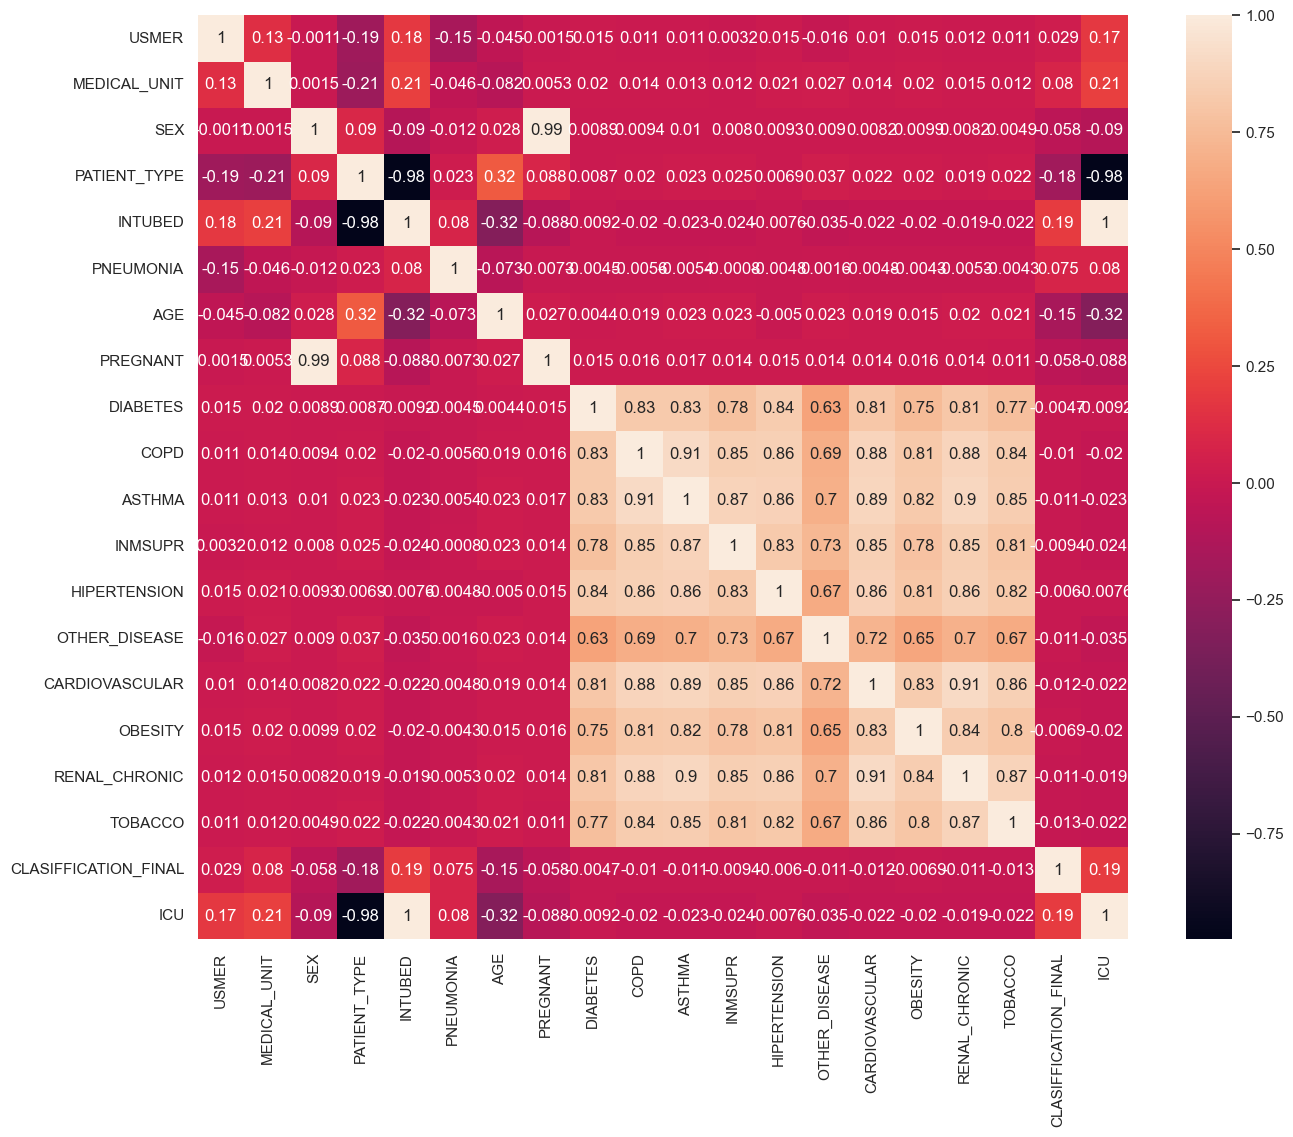

In [9]:
#sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df.corr(), annot=True)

# Dividing data into train and test data

In [14]:
x = df.drop(['ICU','DATE_DIED'], axis=1)
x

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  \
0            2             1    1             1       97          1   65   
1            2             1    2             1       97          1   72   
2            2             1    2             2        1          2   55   
3            2             1    1             1       97          2   53   
4            2             1    2             1       97          2   68   
...        ...           ...  ...           ...      ...        ...  ...   
1048570      2            13    2             1       97          2   40   
1048571      1            13    2             2        2          2   51   
1048572      2            13    2             1       97          2   55   
1048573      2            13    2             1       97          2   28   
1048574      2            13    2             1       97          2   52   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0               2         2     2       2        2             1   
1              97         2     2       2        2             1   
2              97         1     2       2        2             2   
3               2         2     2       2        2             2   
4              97         1     2       2        2             1   
...           ...       ...   ...     ...      ...           ...   
1048570        97         2     2       2        2             2   
1048571        97         2     2       2        2             1   
1048572        97         2     2       2        2             2   
1048573        97         2     2       2        2             2   
1048574        97         2     2       2        2             2   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0                    2               2        2              2        2   
1                    2               2        1              1        2   
2                    2               2        2              2        2   
3                    2               2        2              2        2   
4                    2               2        2              2        2   
...                ...             ...      ...            ...      ...   
1048570              2               2        2              2        2   
1048571              2               2        2              2        2   
1048572              2               2        2              2        2   
1048573              2               2        2              2        2   
1048574              2               2        2              2        2   

         CLASIFFICATION_FINAL  
0                           3  
1                           5  
2                           3  
3                           7  
4                           3  
...                       ...  
1048570                     7  
1048571                     7  
1048572                     7  
1048573                     7  
1048574                     7  

[1048575 rows x 19 columns]

In [10]:
y = df['ICU']
y

0          97
1          97
2           2
3          97
4          97
           ..
1048570    97
1048571     2
1048572    97
1048573    97
1048574    97
Name: ICU, Length: 1048575, dtype: int64

# Model Building

In [11]:
from sklearn.tree import DecisionTreeClassifier # importing the sklearn package

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy') # ASM(information gain) using Entropy

In [15]:
model_train = model.fit(x,y)

# Prediction

In [16]:
pred = model_train.predict(x)
pred

array([97, 97,  2, ..., 97, 97, 97], dtype=int64)

# Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [18]:
cf = confusion_matrix(y,pred) # diagnostic of classification 
cf

array([[ 12169,   4689,      0,      0],
       [  2543, 173141,      0,      1],
       [     0,      0, 848544,      0],
       [    11,     80,      0,   7397]], dtype=int64)

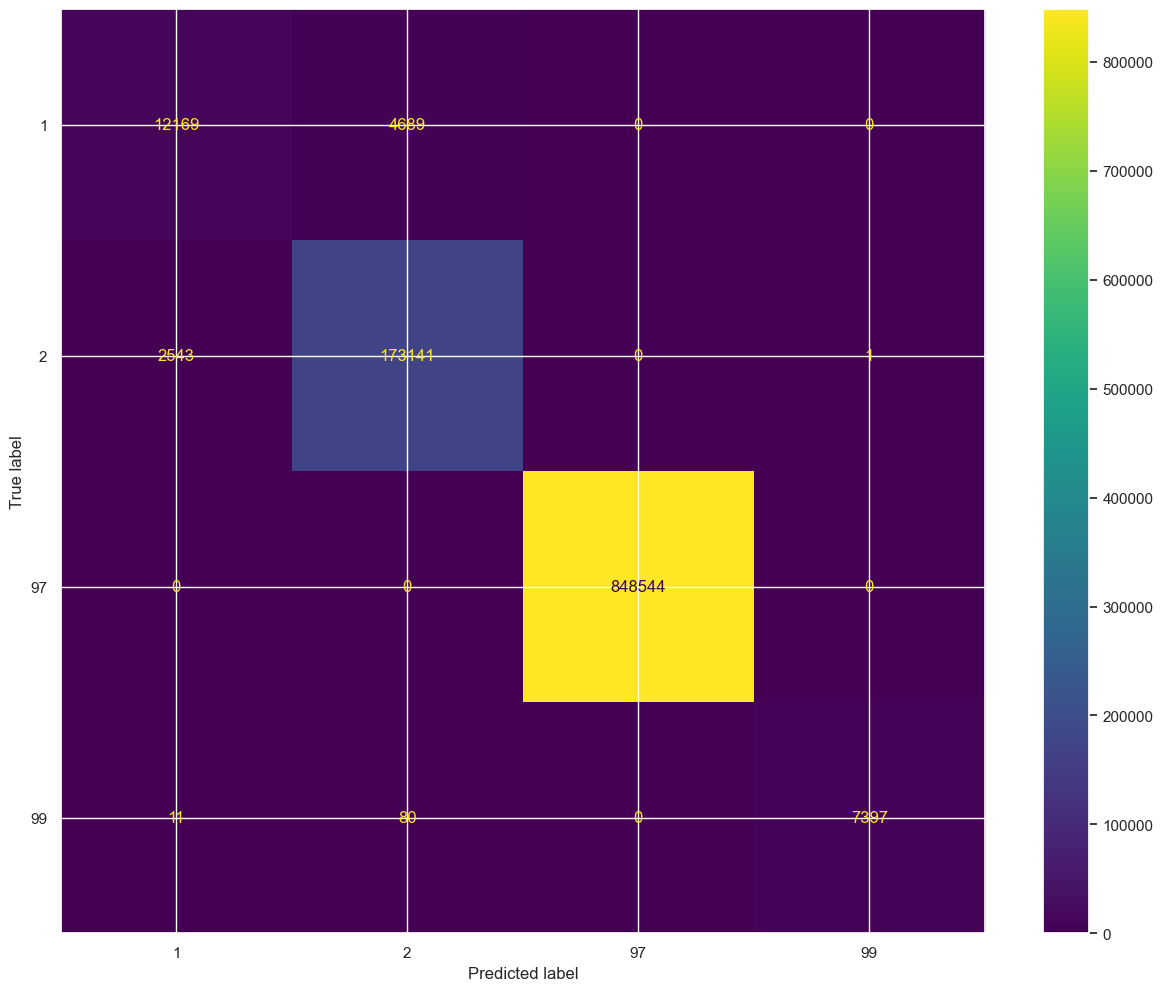

In [19]:
a = ConfusionMatrixDisplay(cf,display_labels=model_train.classes_)
a.plot()

<AxesSubplot:>

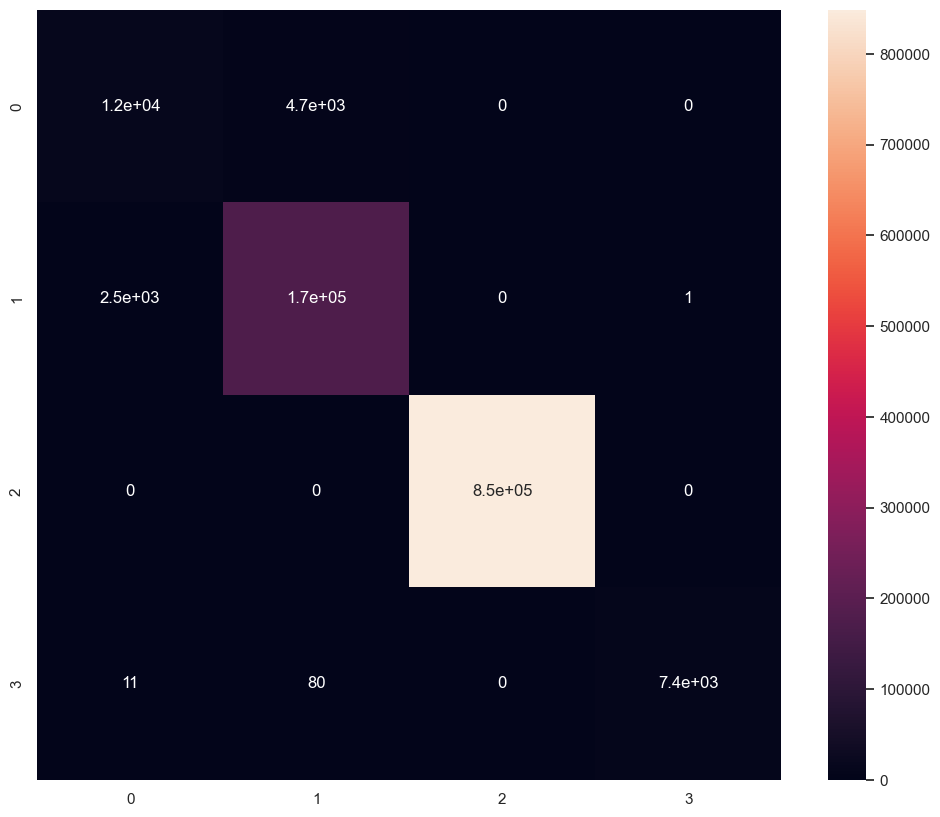

In [20]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(cf, annot=True)

In [22]:
accuracy_score(y,pred) # Checking the accuracy between actual value v/s predicted

0.9930152826454951

In [23]:
# To know error
1- accuracy_score(y, pred)

0.006984717354504899

# ASM(information gain) using Gini index

In [24]:
model1 = DecisionTreeClassifier(criterion = 'gini')

In [25]:
model_train1 = model1.fit(x,y)

In [26]:
pred1 = model_train1.predict(x)
pred1

array([97, 97,  2, ..., 97, 97, 97], dtype=int64)

In [27]:
cf1 = confusion_matrix(y,pred1) # diagnostic of classification 
cf1

array([[ 12169,   4689,      0,      0],
       [  2543, 173141,      0,      1],
       [     0,      0, 848544,      0],
       [    11,     80,      0,   7397]], dtype=int64)

<AxesSubplot:>

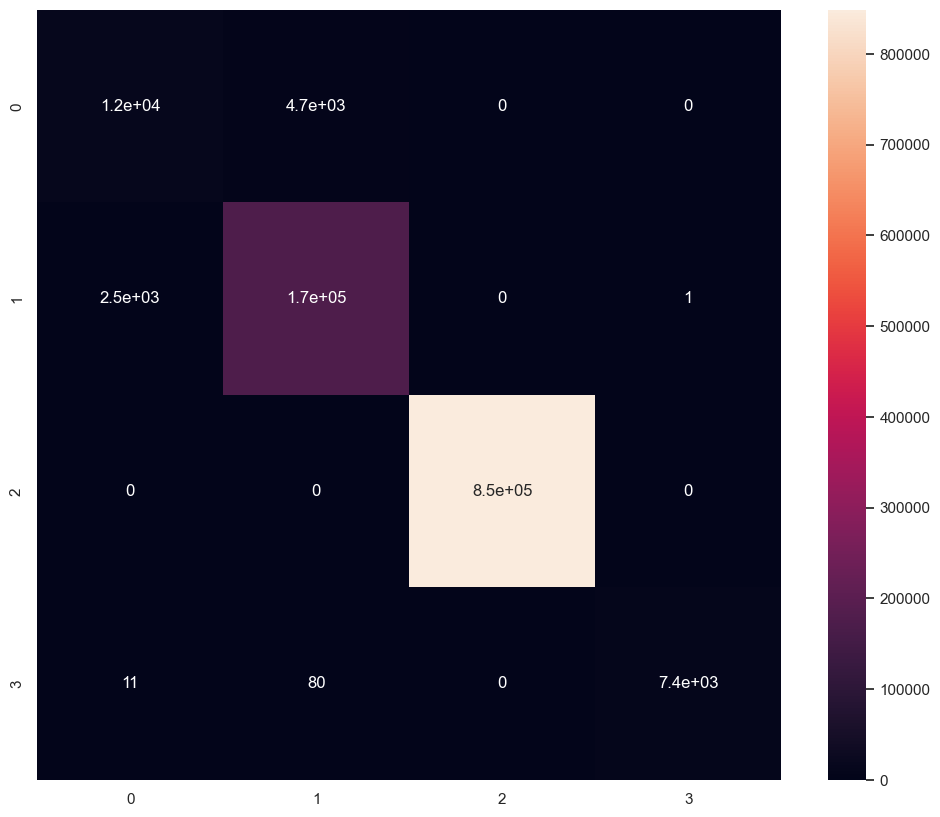

In [28]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(cf1, annot=True)

In [29]:
accuracy_score(y,pred1)

0.9930152826454951

In [30]:
# To know error
1- accuracy_score(y, pred)

0.006984717354504899